<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Question 1
In this question we will be working with the Wisconsin breast cancer dataset.  First, run the cells below to load the data, split it into training and test sets, and then scale the input data.

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X.shape

(569, 30)

In [4]:
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
y = y.to_numpy()

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale the inputs to help it converge more easily
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Question 1.1 [10 points]
In lecture we discussed that the cost function J(w) for logistic regression is the Negative Log Loss:  

$$ J\left(w\right)=\ NLL(w)=-{\sum_{i=1}^{N}{y_i\log{\left(\sigma\left(w^Tx_i\right)\right)}+\left(1-y_i\right)log(1-\sigma\left(w^Tx_i\right))}\ } $$


The simplified gradient of this cost function with respect to w is:  

$$ \mathrm{\nabla\ NLL}\left(w\right)=-\sum_{i=1}^{N}{\left[y_i-\sigma(w^Tx_i)\right]x_i} $$


Show the intermediate steps to formulate the above gradient of the NLL, starting with the above equation for NLL and ending with the above equation for the gradient with respect to the weights.  Your answer should show minimum 3-4 steps and for each step you should include a brief (few words) comment on what you are doing at that step.

DERIVATION:

1. For simplicity, I will be deriving the gradient for one data point, and that can be applied to all datapoints ${i}$ over the dataset

2. Assume:

$$ L = - (y*log{(a)} + (1-y)*log{(1-a)}) $$

$$ a = \left(\sigma\left(z\right)\right)$$

$$ z = (w^T*x) $$

3. And now, we have to find the derivative of ${L}$

4. ${\frac{d(L)}{d(w)}}$ = ${\frac{d(L)}{d(a)}} * {\frac{d(a)}{d(z)}} * {\frac{d(z)}{d(w)}}$

5. 

$$ {\frac{d(L)}{d(a)}} = {\frac{d(-(y*log{(a)} + (1-y)*log{(1-a)}))}{d(a)}} $$

$$ {\frac{d(L)}{d(a)}} = \frac{-y}{a} + \frac{1-y}{1-a} $$

6. 

$$ {\frac{d(a)}{d(z)}} = \frac{d(\frac{1}{1 + e^-z})}{d(z)} $$

$$ {\frac{d(a)}{d(z)}} = \frac{e^-z}{(1+e^-z)^2} $$

Rearranging the euqation for ${a}$ and replacing ${\frac{1}{1 + e^-z}}$,

$$ {\frac{d(a)}{d(z)}} = \frac{\frac{1-a}{a}}{a^2} $$

$$ {\frac{d(a)}{d(z)}} = a*(1-a)$$

7. 

$$ {\frac{d(z)}{d(w)}} = \frac{d(w^T*x)}{d(w)} $$

$$ {\frac{d(z)}{d(w)}} = x $$

8. 

Susbtituting values for ${\frac{d(L)}{d(a)}}$, ${\frac{d(a)}{d(z)}}$, ${\frac{d(z)}{d(w)}}$ in the formula for $ {\frac{d(L)}{d(w)}}$,

$$ {\frac{d(L)}{d(w)}} = (\frac{-y}{a} + \frac{1-y}{1-a}) * a * (1-a) * x $$

$$ {\frac{d(L)}{d(w)}} = (\frac{-y + a*y + a -a*y}{a*(1-a)}) * a * (1-a) * x $$

Cancelling out the terms,

$$ {\frac{d(L)}{d(w)}} = (-y + a) * x $$
$$ {\frac{d(L)}{d(w)}} = -(y - a) * x $$

Replacing ${a}$ with its expansion,

$$ {\frac{d(L)}{d(w)}} = -(y -  \left(\sigma\left((w^T*x)\right)\right)) * x $$

9. 

Now, plugging this equation for one datapoint for the entire summation,

$$ \mathrm{\nabla\ NLL}\left(w\right)=-\sum_{i=1}^{N}{\left[y_i-\sigma(w^Tx_i)\right]x_i} $$



### Question 1.2 [15 points]
We apply gradient descent to find the weight set w which minimizes the NLL.  In each step of gradient descent, we update the weights w as follows:

$$ w_t=w_{t-1}-\eta\nabla\ NLL=w_{t-1}+\eta\sum_{i=1}^{N}{\left[y_i-\sigma(w_{t-1}^Tx_i)\right]x_i} $$

Your task is now to complete the two functions below: `sigmoid()` and `NLL_batch_gradient_descent()`.  Note that you **may NOT** use scikit-learn for these functions (although you may make use of NumPy methods and you are encouraged to do so) - I want you to write them from scratch.

First, complete the below function `sigmoid()`, which takes a NumPy array as input and returns the sigmoid of each element of the input array z, as a NumPy array.

Then, complete the function `NLL_batch_gradient_descent()`.  The function takes the following inputs:  
- Input data X and associated target labels y, both as NumPy arrays  
- A randomly initialized set of weights `weights` as a NumPy array (with one weight for each feature in X).  For simplicity we will not include the bias term.   
- The learning rate value `learning_rate` as a float. 
- The number of iterations of gradient descent to perform, `n_iterations` as an integer (you should perform this many iterations even if your solution converges earlier). 
- A very small value `epsilon` which you should add to `sigmoid(z)` in your function each time you need to use `sigmoid(z)` in a calculation.  We do this because you will at some point need to take the `log(sigmoid(z))` and if `z==0`, this will cause an error.  Therefore, we add a small value to it to prevent this issue (so we use `log(sigmoid(z)+epsilon)` instead).

Your function should perform gradient descent, using the input X and y data to find the optimal set of weights `weights` that minimizes the Negative Log Likelihood cost function.  For simplicity your model does NOT need to include a bias term.

Your function `NLL_batch_gradient_descent()` should return the following values in order stated:  
- The optimal set of weights, as a NumPy array. 
- The cost at each iteration, stored in a list (which will have a length of `n_iterations` when returned)

In [5]:
def sigmoid(z):
    '''
    Calculates the sigmoid of the input z
    '''
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-z))
    raise NotImplementedError()

In [6]:
def NLL_batch_gradient_descent(X,y,weights,learning_rate,n_iterations,epsilon):
    '''
    Performs gradient descent to calculate weights that minimize the NLL cost function without using scikit-learn's LogisticRegression

    Inputs:
        X(np.array): array of the training data inputs
        y(np.array): array of the training data targets
        weights(np.array): array containing a randomly initialized set of weights (not including a bias term)
        learning_rate(float): learning rate to use for training
        n_iterations(int): maximum number of iterations of gradient descent to perform
        epsilon(float): a very small value to add to sigmoid(z) in order to avoid taking the log(0) if the sigmoid(z)=0

    Returns:
        weights(np.array): the optimal set of weights found
        cost_path(list): a list containing the cost calculated at each iteration

    '''
    # YOUR CODE HERE

    cost_path = []
    for n_iter in range(n_iterations):

        z = np.dot(weights, X.T)

        a = sigmoid(z)

        cost = - np.sum(y*np.log(a + epsilon) + (1 - y)*np.log(1 - a + epsilon))

        gradient = -(np.dot((y-a), X))

        weights -= learning_rate*gradient

        cost_path.append(cost)

    return weights, cost_path
    
    raise NotImplementedError()

In [7]:
# Test cell for sigmoid function

sig_z = sigmoid(np.array(0.))
assert sig_z == np.array(0.5)

sig_z = sigmoid(np.array([0.,10.]))
np.testing.assert_allclose(np.array([0., 1.]),np.round(sig_z,0),atol=0.1)

sig_z = sigmoid(np.array(10.))
assert np.round(sig_z,0)==np.array(1.)

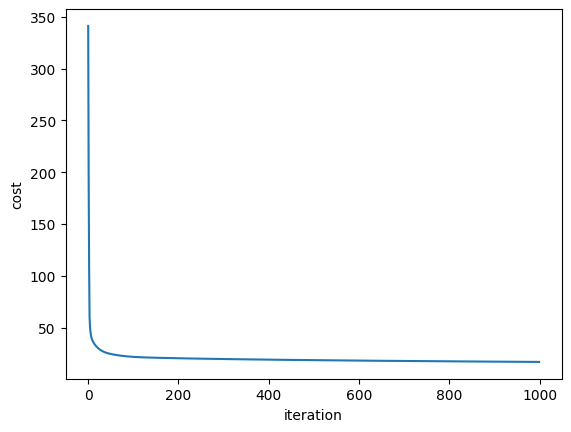

Accuracy of your function on test set is 0.965


In [8]:
# Test cell for NLL_batch_gradient_descent function
# Run gradient descent to get the weights that minimize our cost NLL
n_iterations = 1000
learning_rate = 0.01
epsilon = 1e-10 # Add tiny value to avoid getting nan values from log(0)

# Initialize the weights to random numbers
rand_gen = np.random.RandomState(1)
weights_init = rand_gen.normal(loc=0.0,scale=0.1,size=X_train.shape[1])

# Run logistic regression using your function and plot the cost function
weights_opt,cost_path = NLL_batch_gradient_descent(X_train_scaled,y_train,weights_init,
                                                       learning_rate,n_iterations,epsilon)
plt.plot(range(n_iterations),cost_path)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

assert type(cost_path) == list
assert len(cost_path) == n_iterations
assert weights_opt.shape[0] == 30

# Use our model to generate predictions and calculate accuracy
test_preds_probs = sigmoid(X_test_scaled.dot(weights_opt))

# Convert predicted probabilities to class predictions
test_preds = np.round(test_preds_probs).astype(int)

acc_score = accuracy_score(y_test,test_preds)
print('Accuracy of your function on test set is {:.3f}'.format(acc_score))


### Question 1.3 [10 points]
Now, let’s think about the case where we apply L2 regularization, as we saw in Ridge regression for the linear regression algorithm.  As we saw there, the way to apply this is to add the L2 penalty factor to the cost function.  We use the same penalty factor we used in linear regression.  

What is the new logistic regression cost function including the L2 penalty term?  Write your answer below in the form of an equation (you do not have to add text explaining what it means).  Be very careful about your placement of brackets/parentheses especially to indicate which terms fall inside or outside of any summations.

YOUR ANSWER HERE:

The new cost function would be:

$$ J\left(w\right)=\ NLL(w)=-{\sum_{i=1}^{N}{y_i\log{\left(\sigma\left(w^Tx_i\right)\right)}+\left(1-y_i\right)log(1-\sigma\left(w^Tx_i\right))}\ } + \lambda*{\sum_{j=1}^{N}{w^2_j}} $$

### Question 1.4 [10 points]
What is the new update equation to update the weight set w at each step for your above cost function?  Write your answer below in the form of an equation (you do not have to add text explaining what it means).  Again be careful about placement of brackets/parentheses.

YOUR ANSWER HERE:

The new gradient would be:

$$ \mathrm{\nabla\ NLL}\left(w\right)=-\sum_{i=1}^{N}{\left[y_i-\sigma(w^Tx_i)\right]x_i} + \lambda*w $$

### Question 1.5 [10 points]
In this exercise we are going to take the batch gradient descent algorithm we created above (`NLL_batch_gradient_descent()` for logistic regression and modify it for use in logistic regression with regularization using the L2 penalty.  Use the equations you developed in Questions 1.2 and 1.3 for the NLL cost function and gradient descent update rule for logistic regression with L2, and complete the below function `NLL_withL2_batch_gradient_descent()` which performs gradient descent to optimize the weights for logistic regression with L2 regularization.

The function takes the following inputs:  
- Input data X and associated target labels y, both as NumPy arrays  
- A randomly initialized set of weights `weights` as a NumPy array (with one weight for each feature in X).  For simplicity we will not include the bias term.    
- The learning rate value `learning_rate` as a float. 
- The number of iterations of gradient descent to perform, `n_iterations` as an integer. 
- A very small value `epsilon` which you should add to `sigmoid(z)` in your function whenever you use it in a calculation.  We do this because you will at some point take the `log(sigmoid(z))` and if `sigmoid(z)==0`, this will cause an error.  Therefore, we add a small value to it to prevent this issue (so we use `log(sigmoid(z)+epsilon)` instead).  
- A value for the penalty factor multiple lambda (`lambda`)

Your function should perform gradient descent, using the input X and y data and the NLL cost function **with L2 regularization** to find the optimal set of weights `weights` that minimizes the cost function.  The function can make use of your `sigmoid()` function written above.

Your function `NLL_withL2_batch_gradient_descent()` should return the following values in order stated:  
- The optimal set of weights, as a NumPy array. 
- The cost at each iteration, stored in a list (which will have a length of `n_iterations` when returned)

HINT: at some point in writing your function you may need to multiply an array by itself.  To do this, you will need to compute the matrix product / dot product of the two matrices.  You can do this using `np.dot` or `np.matmul`, however you will need to multiply a transposed version of the array by the array (in its original form).  E.g. if we have an n-dimensional array `a` and we want to compute `a**2` or `a*a`, we can do so using `a.T.dot(a)` or `np.matmul(a.T,a)`

In [9]:
def NLL_withL2_batch_gradient_descent(X,y,weights,learning_rate,n_iterations,epsilon,lambda_val):
    '''
    Performs gradient descent with L2 regularization to calculate weights that minimize the NLL cost function, without using scikit-learn's LogisticRegression

    Inputs:
        X(np.array): array of the training data inputs
        y(np.array): array of the training data targets
        weights(np.array): array containing a randomly initialized set of weights (not including a bias term)
        learning_rate(float): learning rate to use for training
        n_iterations(int): maximum number of iterations of gradient descent to perform
        epsilon(float): a very small value to add to sigmoid(z) in order to avoid taking the log(0) if the sigmoid(z)=0
        lambda_val(float): value to use for the L2 penalty coefficient lambda

    Returns:
        weights(np.array): the optimal set of weights found
        cost_path(list): a list containing the cost calculated at each iteration

    '''
    # YOUR CODE HERE
    cost_path = []
    for n_iter in range(n_iterations):

        z = np.dot(weights, X.T)

        a = sigmoid(z)

        cost = - np.sum(y*np.log(a + epsilon) + (1 - y)*np.log(1 - a + epsilon)) + lambda_val*np.sum(weights)

        gradient = -(np.dot((y-a), X)) + lambda_val*weights

        weights -= learning_rate*gradient

        cost_path.append(cost)

    return weights, cost_path

    raise NotImplementedError()

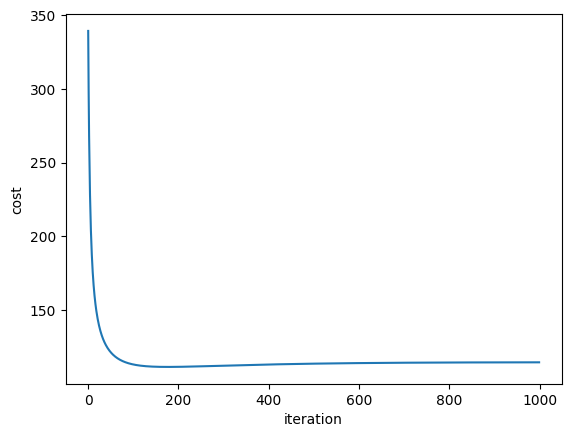

Accuracy of your function is 0.956


In [10]:
# Test cell for NLL_withL2_batch_gradient_descent

# Run gradient descent to get the weights that minimize our cost NLL including regularization
n_iterations = 1000
learning_rate = 0.0001
epsilon = 1e-10 # Add tiny value to avoid getting nan values from log(0)
lambda_val = 10.

# Initialize the weights to random numbers
rand_gen = np.random.RandomState(1)
weights_init = rand_gen.normal(loc=0.0,scale=0.1,size=X_train.shape[1])

weights_opt_l2,cost_path = NLL_withL2_batch_gradient_descent(X_train_scaled,y_train,weights_init,
                                                       learning_rate,n_iterations,epsilon, lambda_val)
plt.plot(range(n_iterations),cost_path)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

assert type(cost_path) == list
assert len(cost_path) == n_iterations
assert weights_opt.shape[0] == 30

# Use our model to generate predictions and calculate accuracy
test_preds_probs = sigmoid(X_test_scaled.dot(weights_opt_l2))

# Convert predicted probabilities to class predictions
test_preds = np.round(test_preds_probs).astype(int)

acc_score = accuracy_score(y_test,test_preds)
print('Accuracy of your function is {:.3f}'.format(acc_score))

assert len(weights_opt)==30
assert acc_score>0.9

## Question 2 [34 points]
In this exercise we are going to be using a dataset of features drawn from the US Census about housing blocks in California.  Each observation is a particular block and the features represent aggregate or average information for that block (e.g. the number of households on the block).  Our objective will be to predict the `median_house_value` for each block from the available features.  We will use MAE as our evaluation metric.

Description of the dataset features can be found here: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [11]:
# Run this to download the data before any other cells below
# This downloads the data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'cal_housing.data':'https://storage.googleapis.com/aipi_datasets/cal_housing.data'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [12]:
# Read in the data to a pandas dataframe
housing_data = pd.read_csv('cal_housing.data',header=None,names=['longitude','latitude','housing_median_age','total_rooms',
                                                 'total_bedrooms','population','households','median_income',
                                                 'median_house_value'])

housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [13]:
# Split into X and y
X = housing_data.drop('median_house_value',axis=1)
y = housing_data['median_house_value']
# Get the feature names
feats = X.columns

# Convert to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [14]:
# Let's start with a normal linear model to get a baseline of performance
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
test_preds = lin_model.predict(X_test)
test_mae = mean_absolute_error(y_test,test_preds)
print('MAE of the linear regression model on the test set is {:.1f}'.format(test_mae))

MAE of the linear regression model on the test set is 50863.5


### Question 2.1 [8 points]
Now, let's try a LASSO model on the data.  Complete the below function `lasso_get_opt_lambda()` which takes as input NumPy arrays containing the dataset splits X_train and y_train, and a list containing different values to evalaute for lambda (referred to as "alpha" in scikit-learn's Lasso algorithm).  The function should use K-folds cross-validation (shuffle=False) with k=5 to find the optimal lambda value for the LASSO model from among the values in the list provided as input to the function (`lambda_values`).  **Remember to scale your X_train data first (use StandardScaler) prior to running your cross-validation.**  Your function should return the following in order:  
- The optimal lambda value from the input list `lambda_values` based on minimizing the cross-validation MAE, as a float  
- A list containing the mean validation MAE (the mean MAE across the 5 validation folds) for each value of lambda in the input list `lambda_values`

In [15]:
def lasso_get_opt_lambda(X_train,y_train,lambda_values):
    '''
    Finds the optimal lambda (alpha) value for the LASSO model

    Inputs:
        X_train(np.array): training data inputs
        y_train(np.array): training data targets
        lambda_values(list): list of values to evaluate for lambda (alpha) - the LASSO penalty factor

    Returns:
        opt_lambda_lasso(float): the optimal lambda (alpha) value found using 5-fold cross validation
        lasso_errors(list): list containing the mean validation MAE for each value of lambda in the input list
    '''
    # Find the optimal lambda (alpha) value for the LASSO model
    # Remember to scale the X data first prior to running cross-validation
    # Return the optimal lambda and a list of the mean validation MAE across all 5 val folds at each value of lambda
    # YOUR CODE HERE

    opt_lambda_lasso = None

    kFold = KFold(n_splits=5, shuffle=False)

    lasso_errors = []

    min_mae = float('inf')

    for lambda_val in lambda_values:

        temp_mae = []

        for train_idx, val_idx in kFold.split(X=X_train,y=y_train):

            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            scaler = StandardScaler()

            X_train_scaled = scaler.fit_transform(X_fold_train)

            X_val_scaled = scaler.transform(X_fold_val)

            model = Lasso(alpha = lambda_val)

            model.fit(X_train_scaled, y_fold_train)

            preds = model.predict(X_val_scaled)

            error = mean_absolute_error(preds, y_fold_val)

            temp_mae.append(error)

        lasso_errors.append(np.mean(temp_mae))

        if np.mean(temp_mae) < min_mae:
            min_mae = np.mean(temp_mae)
            opt_lambda_lasso = lambda_val
        
    return opt_lambda_lasso, lasso_errors

    raise NotImplementedError()

Your function found the optimal lambda value is 0.100
The lowest cross-validated MAE (at the optimal lambda value) was 50849.8


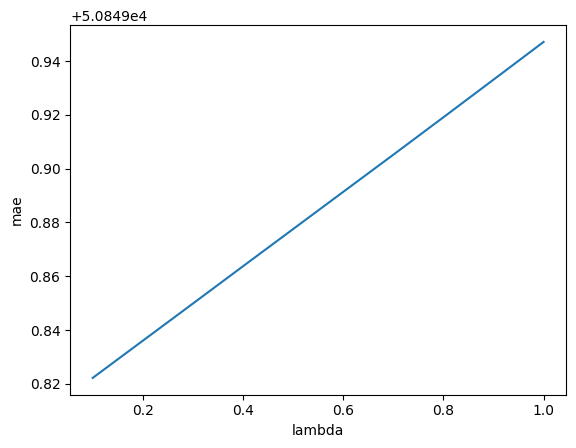

In [16]:
# Test cell for lasso_get_opt_lambda()
lambda_vals = np.arange(0.1,1.1,0.1)
opt_lambda_lasso, lasso_errors = lasso_get_opt_lambda(X_train,y_train,lambda_vals)

print('Your function found the optimal lambda value is {:.3f}'.format(opt_lambda_lasso))
print('The lowest cross-validated MAE (at the optimal lambda value) was {:.1f}'.format(np.min(lasso_errors)))

# Plot the mae vs lambda/alpha values
plt.plot(lambda_vals,lasso_errors)
plt.xlabel('lambda')
plt.ylabel('mae')
plt.show()

assert len(lasso_errors) == len(lambda_vals)
assert np.round(opt_lambda_lasso,1) == 0.1
assert len(lasso_errors) == 10

### Question 2.2 [5 points]
Complete the below function `train_lasso()` which takes as input the value you found as the optimal lambda from the input range provided above, and the NumPy arrays X_train and y_train.  The function should train a LASSO model using the optimal lambda value on the full training data.  **Remember to scale your input data first using StandardScaler**.  Your function should then return the following in order: a list containing the coefficients of your model, and the intercept (bias) value of your model as a float (or NumPy float)

In [17]:
def train_lasso(opt_lambda,X_train,y_train):
    '''
    Trains a LASSO model using the optimal lambda and gets the resulting equation

    Inputs:
        opt_lambda(float): the optimal lambda (alpha) value
        X_train(np.array): training data inputs
        y_train(np.array): training data targets

    Returns:
        coef(list): list of the coefficient values of the trained model
        intercept(float): bias term of the trained model
    '''
    # YOUR CODE HERE

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    model = Lasso(alpha = opt_lambda)

    model.fit(X_train_scaled, y_train)

    return model.coef_, model.intercept_, model

    raise NotImplementedError()

y = 207249.90 + -85808.93*longitude + -90729.77*latitude + 14650.98*housing_median_age + -16730.81*total_rooms + 44954.55*total_bedrooms + -43432.12*population + 19663.97*households + 76708.70*median_income


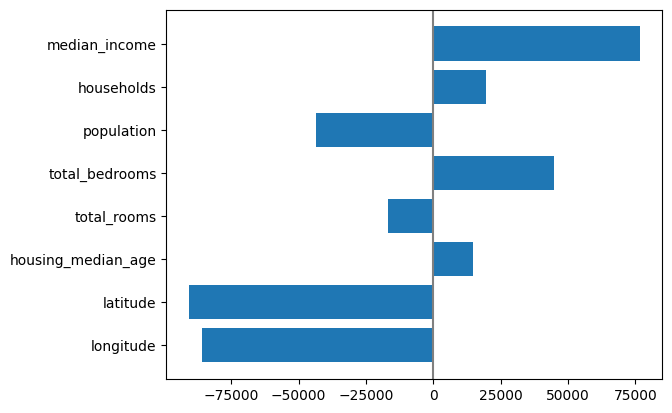

In [18]:
# Test cell for train_lasso()
coef,intercept, lasso_model = train_lasso(opt_lambda_lasso,X_train,y_train)
# Print out the equation
equation = 'y = {:.2f} + '.format(intercept) + ' + '.join(['{:.2f}*{}'.format(coef,var) for coef,var in zip(coef,feats)])
print(equation)

# Plot the coefficients
plt.barh(feats,coef)
plt.axvline(x=0, color='.5')
plt.show()

assert len(coef)==8
assert np.round(intercept)==207250

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
test_preds = lasso_model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test,test_preds)
print('MAE on the test set is {:.1f}'.format(test_mae))


MAE on the test set is 50863.5


### Question 2.3 [8 pts]
Now, let's fit a Ridge regression model on the data.  Complete the below function `ridge_get_opt_lambda()` which takes as input NumPy arrays containing the dataset splits X_train and y_train, and a list containing different values to evalaute for lambda (referred to as "alpha" in scikit-learn's Ridge algorithm).  The function should use K-folds cross-validation (shuffle=False) with k=5 to find the optimal lambda value for the Ridge model from among the values in the list provided as input to the function.  Remember to scale your X_train data first (use StandardScaler) prior to running your cross-validation.  Your function should return the following in order:  
- The optimal lambda_value from the input list `lambda_values` based on minimizing the cross-validation MAE (the value of lambda that results in the lowest mean MAE across the 5 validation folds), as a float  
- A list containing the mean validation MAE (the mean MAE across the 5 validation folds) for each value of lambda in the input list `lambda_values`

In [20]:
def ridge_get_opt_lambda(X_train,y_train,lambda_values):
    '''
    Finds the optimal lambda (alpha) value for the Ridge model

    Inputs:
        X_train(np.array): training data inputs
        y_train(np.array): training data targets
        lambda_values(list): list of values to evaluate for lambda (alpha) - the Ridge penalty factor

    Returns:
        opt_lambda_ridge(float): the optimal lambda (alpha) value found using 5-fold cross validation
        ridge_errors(list): list containing the mean validation MAE for each value of lambda in the input list
    '''
    # YOUR CODE HERE
    kFold = KFold(n_splits=5, shuffle=False)

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    ridge_errors = []

    for lambda_val in lambda_values:

        temp_mae = []

        for train_idx, val_idx in kFold.split(X=X_train_scaled,y=y_train):

            X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # X_train_scaled = scaler.fit_transform(X_fold_train)

            # X_val_scaled = scaler.transform(X_fold_val)

            model = Ridge(alpha = lambda_val)

            model.fit(X_fold_train, y_fold_train)

            preds = model.predict(X_fold_val)

            error = mean_absolute_error(preds, y_fold_val)

            temp_mae.append(error)

        ridge_errors.append(np.mean(temp_mae))
        
    opt_lambda_ridge = lambda_values[np.argmin(ridge_errors)]

    return opt_lambda_ridge, ridge_errors

    raise NotImplementedError()

Your function found the optimal lambda value is 20.400
The lowest cross-validated MAE (at the optimal lambda value) was 50846.0


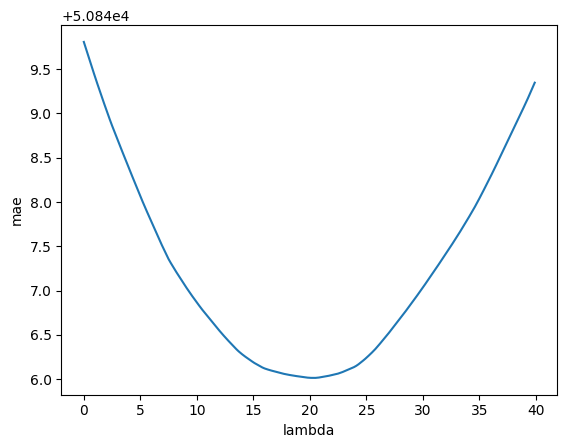

In [21]:
# Test cell for ridge_get_opt_lambda

lambda_values = np.arange(0,40,0.1)
opt_lambda_ridge, ridge_errors = ridge_get_opt_lambda(X_train,y_train,lambda_values)

# Get cross-validation mean MAE score
print('Your function found the optimal lambda value is {:.3f}'.format(opt_lambda_ridge))
min_crossval_MAE = np.min(ridge_errors)
print('The lowest cross-validated MAE (at the optimal lambda value) was {:.1f}'.format(min_crossval_MAE))

# Plot the mae vs lambda/alpha values
plt.plot(lambda_values,ridge_errors)
plt.xlabel('lambda')
plt.ylabel('mae')
plt.show()

assert np.round(opt_lambda_ridge,1) == 20.4
assert len(ridge_errors)==400

### Question 2.4 [5 pts]
Complete the below function `train_ridge()` which takes as input the value you found as the optimal lambda from the input range provided above, and the NumPy arrays X_train and y_train.  The function should train a Ridge model using the optimal lambda value on the full training data (remember to scale your input data first using StandardScaler).  Your function should then return the following in order: a list containing the coefficients of your model, the intercept (bias) value of your model as a float (or NumPy float), and the trained model.

In [22]:
def train_ridge(opt_lambda_ridge,X_train,y_train):
    '''
    Trains a Ridge model using the optimal lambda and gets the resulting equation

    Inputs:
        opt_lambda_ridge(float): the optimal lambda (alpha) value
        X_train(np.array): training data inputs
        y_train(np.array): training data targets

    Returns:
        coef(list): list of the coefficient values of the trained model
        intercept(float): bias term of the trained model
        final_ridge_model(sklearn.liner_model.Ridge): trained Ridge model
    '''
    # YOUR CODE HERE

    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)

    model = Ridge(alpha = opt_lambda_ridge)

    model.fit(X_train_scaled, y_train)

    return model.coef_, model.intercept_, model
    raise NotImplementedError()

y = 207249.90 + -84185.18*longitude + -89117.65*latitude + 14803.98*housing_median_age + -16274.02*total_rooms + 43358.28*total_bedrooms + -43188.23*population + 20632.51*households + 76670.52*median_income


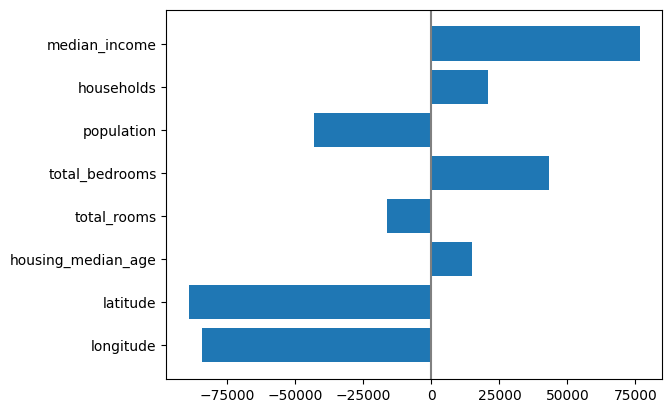

In [23]:
# Test cell for train_lasso()
coef,intercept,ridge_model = train_ridge(opt_lambda_ridge,X_train,y_train)
# Print out the equation
equation = 'y = {:.2f} + '.format(intercept) + ' + '.join(['{:.2f}*{}'.format(coef,var) for coef,var in zip(coef,feats)])
print(equation)

# Plot the coefficients
plt.barh(feats,coef)
plt.axvline(x=0, color='.5')
plt.show()

assert len(coef)==8
assert np.round(intercept)==207250

Finally, let's evaluate the MAE of our Ridge model on the test set.  Run the cell below to do so and check your answer.

In [24]:
# Test cell
scaler = StandardScaler()
scaler.fit(X_train)
X_test_scaled = scaler.transform(X_test)
test_preds = ridge_model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test,test_preds)
print('MAE on the test set is {:.1f}'.format(test_mae))
assert np.round(test_mae)==50883

MAE on the test set is 50883.0


### Question 2.5 [5 points]
Compare the equations of your LASSO and Ridge models. Are they similar or very different in this case in terms of the number of features included and the coefficient magnitudes? Why might that be the case? Which one produces a better cross-validated MAE?  Write your answer below

YOUR ANSWER HERE:

Both LASSO and Ridge models have the same number of intercepts, and the coefficient magnitudes are of the same scale. Looking at magnitudes of the coefficients, Ridge seems to have the smaller coefficient magnitudes, and this can be explained by the fact that it tends to push features close to zero, but doesn't force them to be zero, leaving them at a lower value than the magnitude of coefficients for LASSO.

Ridge seems to produce a better (lower) cross-validated MAE

### Question 2.6 [5 points]
Select the model (your LASSO or Ridge) from above that gave you the lowest cross-validated MAE on the training set (the lowest mean MAE across the validation folds of the cross-validation). What do the coefficients of this model tell you about which features have the largest impact on the median_house_value for a block?  Write your answer below

YOUR ANSWER HERE:

Total_bedrooms and median_income have the largest direct positive impact on the median_house_value, whereas the latitude and longitude have the largest negative impact for the Ridge model. This could mean that the lat and long values have an inverse relationship with median_house_value, in that as they get higher and higher, the median_house_value gets drastically lower. So, places higher up around the North tend to have a lower house value

Whereas, houses with a higher number of bedrooms and houses whose surrounding areas have a higher median income have a higher value

## Question 3 [9 points]
Suppose we have a classification task with 3 classes.  We build two different models, and for the validation set they give us the two confusion matrices below:

![CM1](CM1.png) ![CM2](CM2.png)

For each of the following situations, in a sentence or two explain which model you would select and **justify your answer by referring to the confusion matrix and/or the calculated values of relevant metrics**.  For each part, use only the text given and do not make any other assumptions in what we care about in selecting the model.

### Question 3.1 [3 points]
We want the model with the best overall accuracy in differentiating between the three classes 

YOUR ANSWER HERE:

I would choose Model B as it has a higher overall accuracy

I calculated accuracy by summing up the values of the number of predictions where the classes were the same and divided it by the total predictions

Model A = ${\frac{26+27+29}{26+27+29+2+6}} = .91$

Model B = ${\frac{26+32+27}{26+32+27+4+1}} = .94$

### Question 3.2 [3 points]
If we get a new observation that is of type Class B, we want to be as certain as possible that our model is going to classify it as type Class B.  We don’t want to mis-classify any Class B observations 

YOUR ANSWER HERE:

For this case, the model with the higher recall should be picked, as recall refers to the number of samples of Class B that were predicted correctly among all the samples of class B; and we want that our new sample to be predicted correctly as Class B

Recall of Model A = ${\frac{27}{27 + 6}} = .81$

Recall of Model B = ${\frac{32}{32 + 1}} = .97$

Hence, I would choose Model B

### Question 3.3 [3 points]
If we predict an observation as being of type Class B, we want to be as certain as possible that our prediction is correct.  If we predict a new observation as being Class B and we are wrong, it is a bad situation 

YOUR ANSWER HERE:

For this case, the model with the higher precision should be picked, as precision refers to the number of true Class B samples among all the samples that were predicted as class B.

Precision of Model A = ${\frac{27}{27 + 2}} = .93$

Precision of Model B = ${\frac{32}{32 + 4}} = .88$

Hence, I would choose Model A